In [42]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn import tree

In [43]:
iris = load_iris()
iris_data = iris['data']
iris_target = iris['target']

In [44]:
#print(X_train.shape)
#print(X_test.shape)
#print(Y_train.shape)
#print(Y_test.shape)

In [45]:
target_data = pd.DataFrame(iris_target)
target_data.columns = ['Class']
target_data.groupby('Class').agg({'Class':['count']})

,Class
,count
Class,
0,50
1,50
2,50


In [46]:
#Training an initial model, and establishing the accuracy benchmark

X_train, X_test, Y_train, Y_test = train_test_split(iris_data, iris_target, test_size = 0.2)
clf = tree.DecisionTreeClassifier()
clf.fit(X_train, Y_train)
#tree = clf.tree_

Y_pred = clf.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
initial_test_accuracy = balanced_accuracy_score(Y_test, Y_pred)
print("Initial Test Accuracy : " + str(initial_test_accuracy))

train_pred = clf.predict(X_train)
from sklearn.metrics import balanced_accuracy_score
initial_train_accuracy = balanced_accuracy_score(Y_train, train_pred)
print("Initial Train Accuracy : " + str(initial_train_accuracy))



Initial Test Accuracy : 0.9393939393939394
Initial Train Accuracy : 1.0


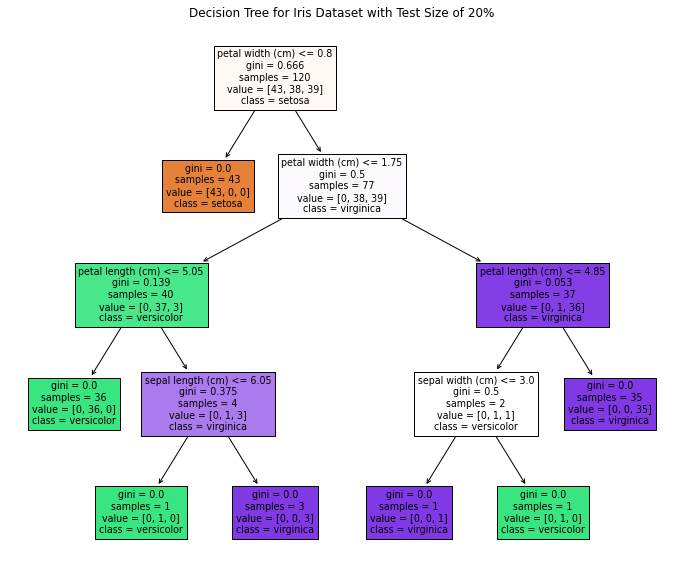

In [47]:
# Visual of Decision Tree

plt.figure(figsize=(12, 10))
tree.plot_tree(clf, filled=True, feature_names = iris['feature_names'], class_names = iris['target_names'], proportion=False)
plt.title("Decision Tree for Iris Dataset with Test Size of 20%")
plt.show()

In [48]:
# Tuning parameters, based on https://medium.com/@mohtedibf/indepth-parameter-tuning-for-decision-tree-6753118a03c3
# and https://medium.com/usf-msds/choosing-the-right-metric-for-evaluating-machine-learning-models-part-2-86d5649a5428




In [49]:
test_data = pd.DataFrame(Y_test)
test_data.columns = ['Class']
test_data.groupby('Class').agg({'Class':['count']})

# Class 2 is slightly unbalanced, so we must acknolowedge that into our performance metrics
# We will choose balanced accuracy as our metrics

,Class
,count
Class,
0,7
1,12
2,11


   Depth  Test Score  Train Score
0      1    0.666667     0.666667
1      2    0.939394     0.965587
2      3    0.909091     0.982681
3      4    0.909091     1.000000
4      5    0.909091     1.000000
5      6    0.909091     1.000000
6      7    0.909091     1.000000
7      8    0.909091     1.000000
8      9    0.909091     1.000000


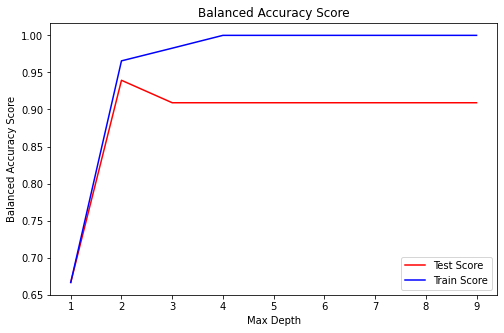

In [50]:
# Tuning for max_depth
max_depth_range = range(1,10)
depths = []
accuracies_test = []
accuracies_train = []
for d in max_depth_range:
    clf = tree.DecisionTreeClassifier(max_depth=d, random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    bas_test = balanced_accuracy_score(Y_test, Y_pred)
    accuracies_test.append(bas_test)
    
    train_pred = clf.predict(X_train)
    bas_train = balanced_accuracy_score(Y_train, train_pred)
    accuracies_train.append(bas_train)
    depths.append(d)
    
data = {'Depth':depths, 'Test Score': accuracies_test, 'Train Score': accuracies_train}
scores = pd.DataFrame(data)    
print(scores)
plt.figure(figsize=(8, 5))
plt.plot(scores['Depth'], scores['Test Score'], color='red', label='Test Score')
plt.plot(scores['Depth'], scores['Train Score'], color='blue', label='Train Score')
plt.xlabel("Max Depth")
plt.ylabel("Balanced Accuracy Score")
plt.title("Balanced Accuracy Score")
plt.legend(["Test Score", "Train Score"], loc='lower right')


[0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.0]
   Min Samples Split  Test Score  Train Score
0                0.1    0.909091     0.982681
1                0.2    0.909091     0.982681
2                0.3    0.909091     0.982681
3                0.4    0.939394     0.965587
4                0.5    0.939394     0.965587
5                0.6    0.939394     0.965587
6                0.7    0.666667     0.666667
7                0.8    0.666667     0.666667
8                0.9    0.666667     0.666667
9                1.0    0.666667     0.666667


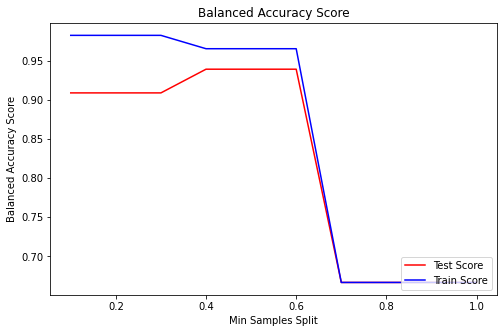

In [51]:
# Tuning for min_samples_split

min_samples_range = list(range(10,101,10))
min_samples_range = [float(x/100) for x in min_samples_range]
print(min_samples_range)

samples = []
accuracies_test = []
accuracies_train = []

for s in min_samples_range:
    
    clf = tree.DecisionTreeClassifier(min_samples_split=s, random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    bas_test = balanced_accuracy_score(Y_test, Y_pred)
    accuracies_test.append(bas_test)
    
    train_pred = clf.predict(X_train)
    bas_train = balanced_accuracy_score(Y_train, train_pred)
    accuracies_train.append(bas_train)
    samples.append(s)

data = {'Min Samples Split':samples, 'Test Score': accuracies_test, 'Train Score': accuracies_train}
scores = pd.DataFrame(data)    
print(scores)
plt.figure(figsize=(8, 5))
plt.plot(scores['Min Samples Split'], scores['Test Score'], color='red', label='Test Score')
plt.plot(scores['Min Samples Split'], scores['Train Score'], color='blue', label='Train Score')
plt.xlabel("Min Samples Split")
plt.ylabel("Balanced Accuracy Score")
plt.title("Balanced Accuracy Score")
plt.legend(["Test Score", "Train Score"], loc='lower right')

[0.1, 0.15, 0.2, 0.25, 0.3, 0.35, 0.4, 0.45, 0.5]
   Min Samples Leaf  Test Score  Train Score
0              0.10    0.939394     0.965587
1              0.15    0.939394     0.965587
2              0.20    0.939394     0.965587
3              0.25    0.939394     0.965587
4              0.30    0.939394     0.965587
5              0.35    0.666667     0.666667
6              0.40    0.666667     0.666667
7              0.45    0.666667     0.666667
8              0.50    0.666667     0.666667


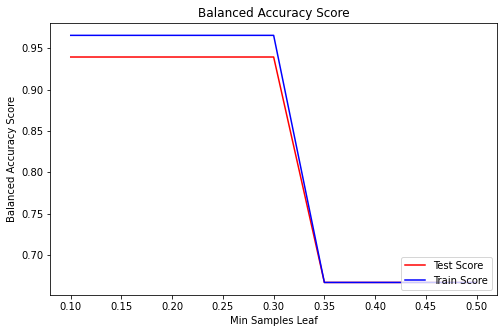

In [52]:
# Tuning for min_samples_leaf

min_samples_range = list(range(10,51,5))
min_samples_range = [float(x/100) for x in min_samples_range]
print(min_samples_range)

samples = []
accuracies_test = []
accuracies_train = []

for s in min_samples_range:
    
    clf = tree.DecisionTreeClassifier(min_samples_leaf=s, random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    bas_test = balanced_accuracy_score(Y_test, Y_pred)
    accuracies_test.append(bas_test)
    
    train_pred = clf.predict(X_train)
    bas_train = balanced_accuracy_score(Y_train, train_pred)
    accuracies_train.append(bas_train)
    samples.append(s)

data = {'Min Samples Leaf':samples, 'Test Score': accuracies_test, 'Train Score': accuracies_train}
scores = pd.DataFrame(data)    
print(scores)
plt.figure(figsize=(8, 5))
plt.plot(scores['Min Samples Leaf'], scores['Test Score'], color='red', label='Test Score')
plt.plot(scores['Min Samples Leaf'], scores['Train Score'], color='blue', label='Train Score')
plt.xlabel("Min Samples Leaf")
plt.ylabel("Balanced Accuracy Score")
plt.title("Balanced Accuracy Score")
plt.legend(["Test Score", "Train Score"], loc='lower right')

   Max Features  Test Score  Train Score
0             1    0.878788          1.0
1             2    0.909091          1.0
2             3    0.939394          1.0
3             4    0.909091          1.0


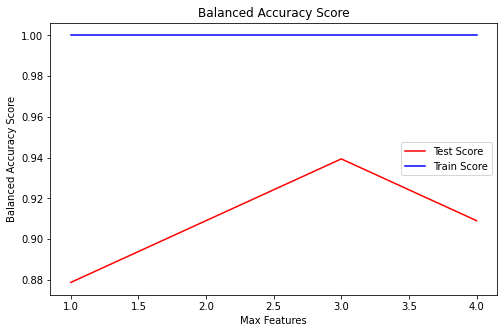

In [53]:
# Tuning for max features

max_features_range = range(1,iris['data'].shape[1]+1)

features = []
accuracies_test = []
accuracies_train = []

for f in max_features_range:
    clf = tree.DecisionTreeClassifier(max_features=f, random_state=0)
    clf.fit(X_train, Y_train)
    Y_pred = clf.predict(X_test)
    bas_test = balanced_accuracy_score(Y_test, Y_pred)
    accuracies_test.append(bas_test)
    
    train_pred = clf.predict(X_train)
    bas_train = balanced_accuracy_score(Y_train, train_pred)
    accuracies_train.append(bas_train)
    features.append(f)

data = {'Max Features':features, 'Test Score': accuracies_test, 'Train Score': accuracies_train}
scores = pd.DataFrame(data)    
print(scores)
plt.figure(figsize=(8, 5))
plt.plot(scores['Max Features'], scores['Test Score'], color='red', label='Test Score')
plt.plot(scores['Max Features'], scores['Train Score'], color='blue', label='Train Score')
plt.xlabel("Max Features")
plt.ylabel("Balanced Accuracy Score")
plt.title("Balanced Accuracy Score")
plt.legend(["Test Score", "Train Score"], loc='center right')

In [59]:
# Model fine tuned

#Training an initial model, and establishing the accuracy benchmark

X_train, X_test, Y_train, Y_test = train_test_split(iris_data, iris_target, test_size = 0.2)
clf = tree.DecisionTreeClassifier(max_depth = 2 ,min_samples_split = 0.6 , min_samples_leaf = 0.3,max_features=4)
clf.fit(X_train, Y_train)

Y_pred = clf.predict(X_test)
from sklearn.metrics import balanced_accuracy_score
fined_test_accuracy = balanced_accuracy_score(Y_test, Y_pred)
print("Fine-tuned Test Accuracy : " + str(fined_test_accuracy))

train_pred = clf.predict(X_train)
from sklearn.metrics import balanced_accuracy_score
fined_train_accuracy = balanced_accuracy_score(Y_train, train_pred)
print("Fine-tuned Train Accuracy : " + str(fined_train_accuracy))




Fine-tuned Test Accuracy : 0.9696969696969697
Fine-tuned Train Accuracy : 0.951159951159951


In [60]:
print("Initial Train Accuracy : " + str(initial_train_accuracy))
print("Fine-tuned Train Accuracy : " + str(fined_train_accuracy))

print("\n")

print("Initial Test Accuracy : " + str(initial_test_accuracy))
print("Fine-tuned Test Accuracy : " + str(fined_test_accuracy))

Initial Train Accuracy : 1.0
Fine-tuned Train Accuracy : 0.951159951159951


Initial Test Accuracy : 0.9393939393939394
Fine-tuned Test Accuracy : 0.9696969696969697


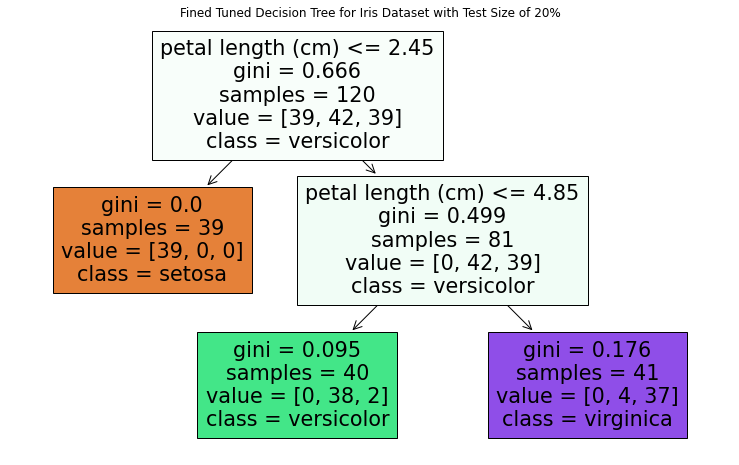

In [64]:
# Visual of Decision Tree

plt.figure(figsize=(13, 8))
tree.plot_tree(clf, filled=True, feature_names = iris['feature_names'], class_names = iris['target_names'], proportion=False)
plt.title("Fined Tuned Decision Tree for Iris Dataset with Test Size of 20%")
plt.show()

In [56]:
#from sklearn.metrics import confusion_matrix
#confusion_matrix(Y_test, Y_pred)

In [57]:
#from sklearn.metrics import classification_report
#print(classification_report(Y_test, Y_pred, target_names=iris['target_names']))

In [58]:
# Model with test size of 30% 
# X_train_3, X_test_3, Y_train_3, Y_test_3 = train_test_split(data, target, test_size = 0.3)
# clf3 = tree.DecisionTreeClassifier(max_depth=3, random_state=0)
# clf3.fit(X_train_3, Y_train_3)
# plt.figure(figsize=(12, 10))
# tree.plot_tree(clf3, filled=True, feature_names = iris['feature_names'], class_names = iris['target_names'], proportion=False)
# plt.title("Decision Tree for Iris Dataset with Test Size of 30%")
# plt.show()
